In [2]:
! pip install tensorflow

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.74.0-cp312-cp312-macosx_11_0_universal2.whl.metadata (3.8 kB)
  Using cached h5py-3.14.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.7 kB)
  Using cached ml_dtypes-0.5.3-cp312-cp312-macosx_10_13_universal2.whl.metadata (8.9 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached rich-14.1.0-py3-none-a

California Housing dataset shape: (20640, 8)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target variable: Median house value in $100,000s

Descriptive Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRIC

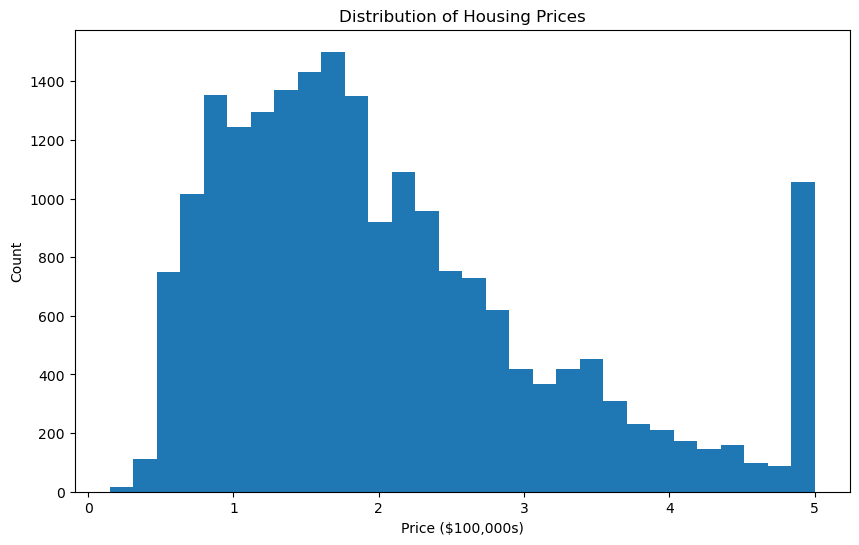


Feature correlations with price:
PRICE         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: PRICE, dtype: float64


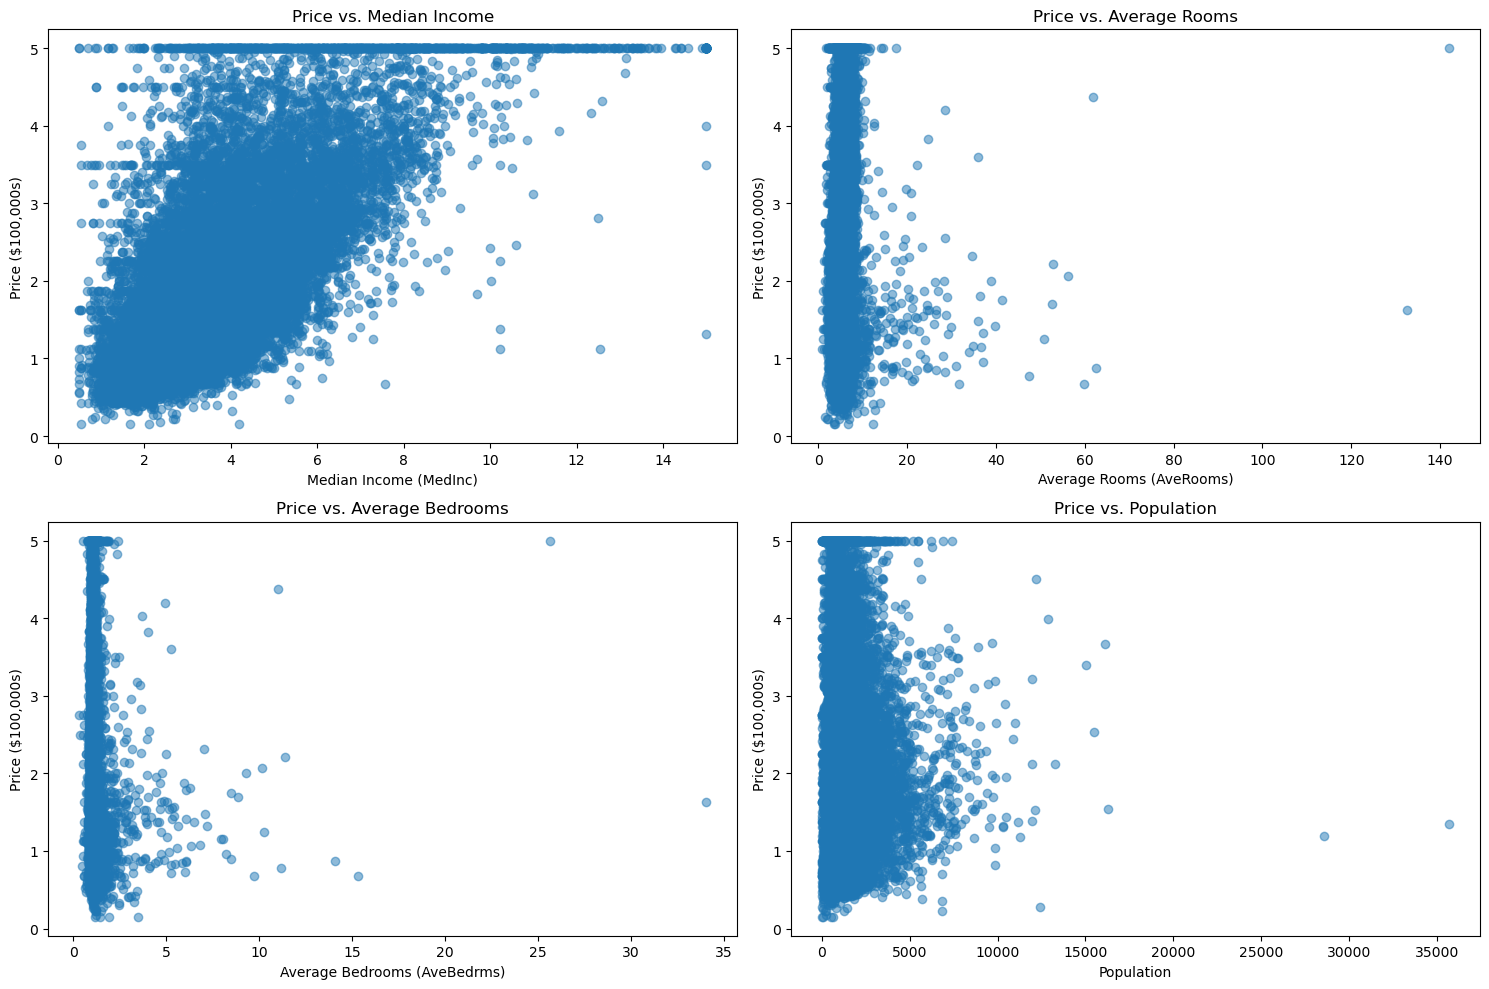

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Set seeda for reproducible results
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)

# Load the California Housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Examine the dataset
print(f"California Housing dataset shape: {X.shape}")
print(f"Features: {housing.feature_names}")
print(f"Target variable: Median house value in $100,000s")

# View descriptive statistics
housing_df = pd.DataFrame(X, columns=housing.feature_names)
housing_df['PRICE'] = y
print("\nDescriptive Statistics:")
print(housing_df.describe())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Plot the distribution of housing prices
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30)
plt.xlabel('Price ($100,000s)')
plt.ylabel('Count')
plt.title('Distribution of Housing Prices')
plt.show()

# Look at correlations with target variable
correlations = housing_df.corr()['PRICE'].sort_values(ascending=False)
print("\nFeature correlations with price:")
print(correlations)

# Plot a few key features against price
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(housing_df['MedInc'], housing_df['PRICE'], alpha=0.5)
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Price ($100,000s)')
plt.title('Price vs. Median Income')

plt.subplot(2, 2, 2)
plt.scatter(housing_df['AveRooms'], housing_df['PRICE'], alpha=0.5)
plt.xlabel('Average Rooms (AveRooms)')
plt.ylabel('Price ($100,000s)')
plt.title('Price vs. Average Rooms')

plt.subplot(2, 2, 3)
plt.scatter(housing_df['AveBedrms'], housing_df['PRICE'], alpha=0.5)
plt.xlabel('Average Bedrooms (AveBedrms)')
plt.ylabel('Price ($100,000s)')
plt.title('Price vs. Average Bedrooms')

plt.subplot(2, 2, 4)
plt.scatter(housing_df['Population'], housing_df['PRICE'], alpha=0.5)
plt.xlabel('Population')
plt.ylabel('Price ($100,000s)')
plt.title('Price vs. Population')

plt.tight_layout()
plt.show()

In [4]:
# Define a simple neural network model
model = keras.Sequential([
    # Input layer - explicit definition for clarity
    keras.layers.Input(shape=(8,)),  # 8 features in the California dataset
    
    # First hidden layer
    keras.layers.Dense(units=64, activation='relu'),
    
    # Second hidden layer
    keras.layers.Dense(units=32, activation='relu'),
    
    # Output layer - single neuron with no activation for regression
    keras.layers.Dense(units=1)
])

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile the model with basic settings
model.compile(
    optimizer="RMSprop",
    loss='mean_squared_error',  # Standard loss for regression
    metrics=['mae']  # Mean Absolute Error in $100,000s
)

In [6]:
# Train the model with detailed monitoring
history = model.fit(
    X_train,                  # Input features
    y_train,                  # Target housing prices
    batch_size=64,            # Process 64 examples per gradient update
    epochs=100,               # Maximum number of passes through the dataset
    validation_split=0.2,     # Use 20% of training data for validation
    verbose=1                 # Show progress during training
)

# Store training metrics for analysis
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mae = history.history['mae']
val_mae = history.history['val_mae']
epochs_range = range(1, len(train_loss) + 1)

Epoch 1/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 1535.6711 - mae: 14.0876 - val_loss: 9.5252 - val_mae: 2.4016
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 224.3575 - mae: 8.2663 - val_loss: 13.0508 - val_mae: 2.9439
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 182.0091 - mae: 7.1609 - val_loss: 3.5100 - val_mae: 1.3911
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 143.4598 - mae: 6.7980 - val_loss: 217.3591 - val_mae: 12.0042
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 125.3689 - mae: 6.6339 - val_loss: 4.7020 - val_mae: 1.7699
Epoch 6/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 113.9757 - mae: 5.7447 - val_loss: 1.6526 - val_mae: 0.9063
Epoch 7/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 104.9868 - mae: 6.0209 - val_loss: 1.6893 - val_mae: 0.9446
Epoch 8/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 90.8509 - mae: 5.3427 - val_loss: 33.6753 - val_mae: 4.1647
Epoch 9/10

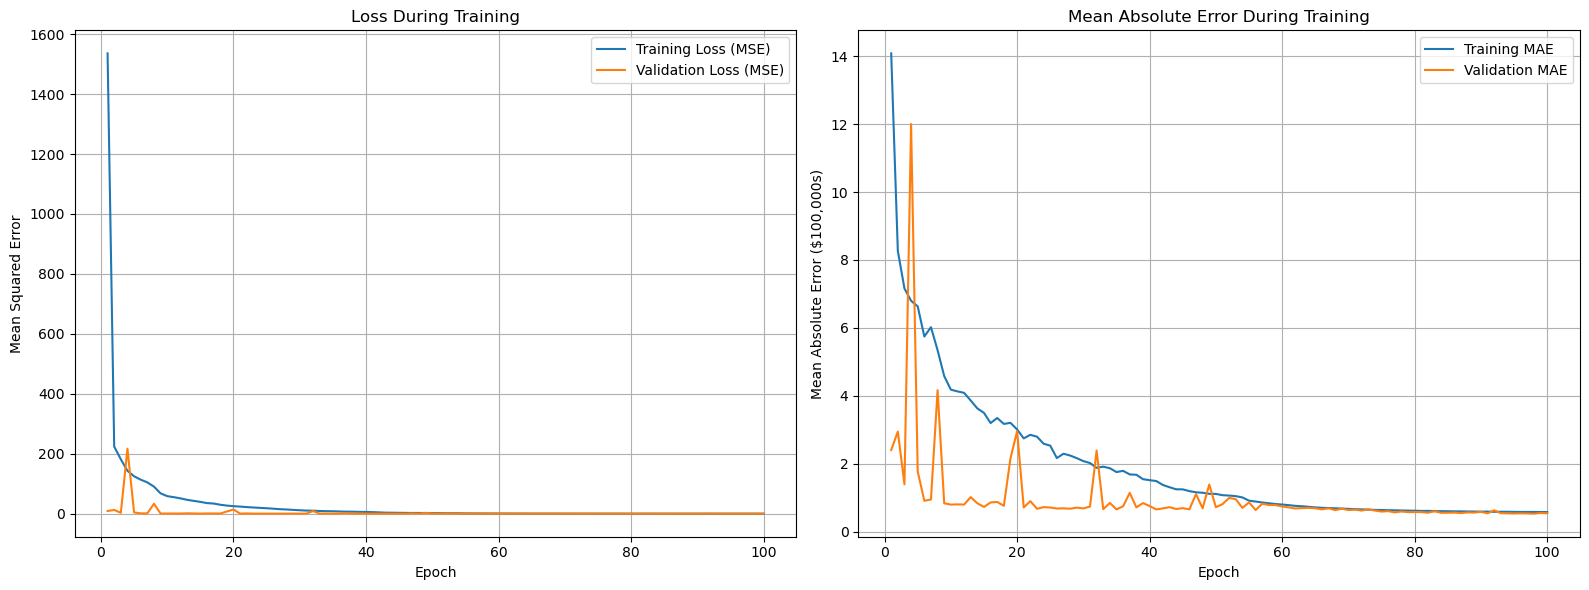

Final training loss (MSE): 0.6021
Final validation loss (MSE): 0.5279
Final training MAE: $0.5733 ($100,000s)
Final validation MAE: $0.5372 ($100,000s)
Model improved by 94.5% during training.


In [7]:
# Plot training history
plt.figure(figsize=(16, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss (MSE)')
plt.plot(epochs_range, val_loss, label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Loss During Training')
plt.grid(True)
plt.legend()

# Plot mean absolute error
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_mae, label='Training MAE')
plt.plot(epochs_range, val_mae, label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error ($100,000s)')
plt.title('Mean Absolute Error During Training')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print final training stats
print(f"Final training loss (MSE): {train_loss[-1]:.4f}")
print(f"Final validation loss (MSE): {val_loss[-1]:.4f}")
print(f"Final training MAE: ${train_mae[-1]:.4f} ($100,000s)")
print(f"Final validation MAE: ${val_mae[-1]:.4f} ($100,000s)")

# Check if training was successful
if val_loss[-1] < val_loss[0]:
    improvement = (1 - val_loss[-1]/val_loss[0]) * 100
    print(f"Model improved by {improvement:.1f}% during training.")
else:
    print("Model did not improve during training. Consider adjusting hyperparameters.")

Test Loss (MSE): 0.5303
Test MAE: $0.5379 ($100,000s)
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step
Mean prediction error: $0.0174 ($100,000s)
Median prediction error: $0.1365 ($100,000s)
Maximum prediction error: $4.4992 ($100,000s)


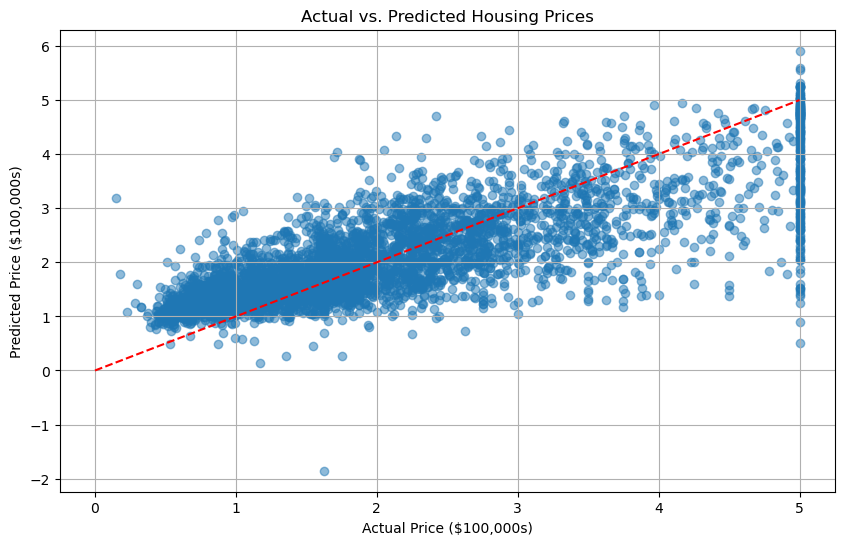

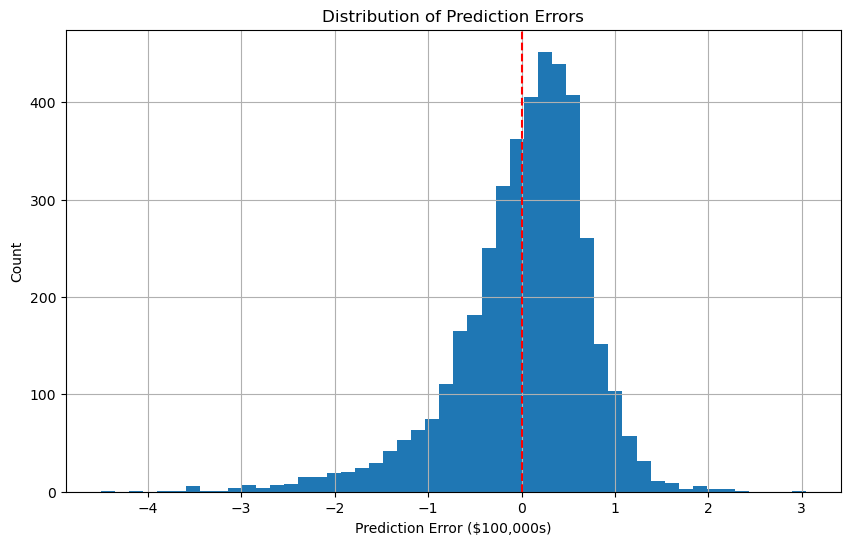

MAE for houses $0-1 million: $0.5639 ($100,000s), 730 houses
MAE for houses $1-2 million: $0.3760 ($100,000s), 1684 houses
MAE for houses $2-3 million: $0.4895 ($100,000s), 956 houses
MAE for houses $3-4 million: $0.7485 ($100,000s), 415 houses
MAE for houses $4-5 million: $1.0904 ($100,000s), 159 houses


In [8]:
# Evaluate on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: ${test_mae:.4f} ($100,000s)")

# Make predictions and analyze errors
predictions = model.predict(X_test)
errors = predictions.flatten() - y_test

# Calculate key error metrics
mean_error = np.mean(errors)
median_error = np.median(errors)
max_error = np.max(np.abs(errors))

print(f"Mean prediction error: ${mean_error:.4f} ($100,000s)")
print(f"Median prediction error: ${median_error:.4f} ($100,000s)")
print(f"Maximum prediction error: ${max_error:.4f} ($100,000s)")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([0, 5], [0, 5], 'r--')  # Perfect prediction line
plt.xlabel('Actual Price ($100,000s)')
plt.ylabel('Predicted Price ($100,000s)')
plt.title('Actual vs. Predicted Housing Prices')
plt.grid(True)
plt.show()

# Plot error distribution
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50)
plt.xlabel('Prediction Error ($100,000s)')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Check error by price range
price_ranges = [0, 1, 2, 3, 4, 5]
for i in range(len(price_ranges)-1):
    # Filter test data for this price range
    mask = (y_test >= price_ranges[i]) & (y_test < price_ranges[i+1])
    range_mae = np.mean(np.abs(errors[mask]))
    range_count = np.sum(mask)
    
    if range_count > 0:
        print(f"MAE for houses ${price_ranges[i]}-{price_ranges[i+1]} million: ${range_mae:.4f} ($100,000s), {range_count} houses")